In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from numpy.random import randn
import random
from IPython.core.display import display,Image
from string import Template
import IPython.display
import warnings

In [5]:
import MultiLinearRegression

MSE (Custom): 306.2095456831876
MSE (sklearn): 305.7741316228642
MSE Inverse:  306.2100465232259
MSE Ridge (sklearn):  305.21339457913416
MSE Ridge (scratch):  306.2100465232259


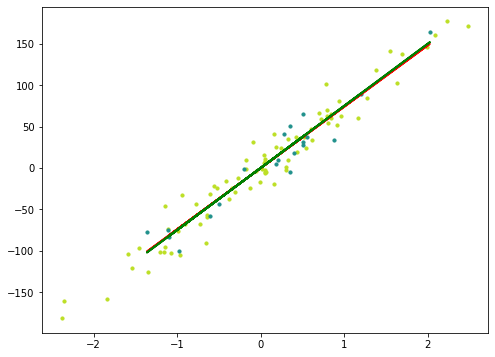

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

#grad = True
regressor = MultiLinearRegression.LinearRegression(learning_rate=0.01, n_iterations=1000, gradient_descent=True)
regressor.fit(X_train, y_train)
#print(regressor.weights.shape)
predictions = regressor.predict(X_test)

regressor_T = MultiLinearRegression.LinearRegression(learning_rate=0.01, n_iterations=1000, gradient_descent=False)
regressor_T.fit(X_train, y_train)
#print(regressor.weights.shape)
predictions_T = regressor_T.predict(X_test)

reg_sk = LinearRegression().fit(X_train, y_train)
pred_sk = reg_sk.predict(X_test)

# Ridge Regression from sklearn

ridge_sk = Ridge(alpha=1)
ridge_sk.fit(X_train, y_train)
preds_ridge_sk = ridge_sk.predict(X_test)

# Ridge from scratch

ridge = MultiLinearRegression.RidgeRegression(alpha=1)
ridge.fit(X_train, y_train)
preds_ridge = ridge.predict(X_test)
    
mse_sk = mean_squared_error(y_test, pred_sk)
mse = mean_squared_error(y_test, predictions)
mse_T = mean_squared_error(y_test, predictions_T)
mse_sk_ridge = mean_squared_error(y_test, preds_ridge_sk)
mse_ridge = mean_squared_error(y_test, preds_ridge)
print("MSE (Custom):", mse)
print("MSE (sklearn):", mse_sk)
print("MSE Inverse: ", mse_T)
print("MSE Ridge (sklearn): ", mse_sk_ridge)
print("MSE Ridge (scratch): ", mse_ridge)

#y_pred_line = regressor.predict(X)

X_test.shape, predictions.shape

cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
# plt.plot(X_test, predictions, color='black', linewidth=4, label="Prediction")
# plt.plot(X_test, pred_sk, color='red', linewidth=2, label="Prediction")
# plt.plot(X_test, predictions_T, color='green', linewidth=6, label="Prediction")
plt.plot(X_test, preds_ridge_sk, color='red', linewidth=2, label="Prediction")
plt.plot(X_test, preds_ridge, color='green', linewidth=2, label="Prediction")
plt.show()